# Zomato Dataset Exploratory Data Analysis

# About Dataset
## Context
Being a foody person I always wonder to find an list of best places to visit nearby. So, I decided to help my community find the best cuisines around their area.

## Content
Zomato API Analysis is one of the most useful analysis for foodies who want to taste the best cuisines of every part of the world which lies in their budget. This analysis is also for those who want to find the value for money restaurants in various parts of the country for the cuisines. Additionally, this analysis caters the needs of people who are striving to get the best cuisine of the country and which locality of that country serves that cuisines with maximum number of restaurants.

## Data Storage:
The collected data has been stored in the Comma Separated Value file Zomato.csv. Each restaurant in the dataset is uniquely identified by its Restaurant Id. Every Restaurant contains the following variables:

- Restaurant Id: Unique id of every restaurant across various cities of the world
- Restaurant Name: Name of the restaurant
- Country Code: Country in which restaurant is located
- City: City in which restaurant is located
- Address: Address of the restaurant
- Locality: Location in the city
- Locality Verbose: Detailed description of the locality
- Longitude: Longitude coordinate of the restaurant's location
- Latitude: Latitude coordinate of the restaurant's location
- Cuisines: Cuisines offered by the restaurant
- Average Cost for two: Cost for two people in different currencies 👫
- Currency: Currency of the country
- Has Table booking: yes/no
- Has Online delivery: yes/ no
- Is delivering: yes/ no
- Switch to order menu: yes/no
- Price range: range of price of food
- Aggregate Rating: Average rating out of 5
- Rating color: depending upon the average rating color
- Rating text: text on the basis of rating of rating
- Votes: Number of ratings casted by people

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Data Extraction - zomato.csv

In [2]:
# csv is not UTF-8 encoded
df=pd.read_csv('zomato.csv',encoding='latin-1')
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [3]:
list(df.columns)

['Restaurant ID',
 'Restaurant Name',
 'Country Code',
 'City',
 'Address',
 'Locality',
 'Locality Verbose',
 'Longitude',
 'Latitude',
 'Cuisines',
 'Average Cost for two',
 'Currency',
 'Has Table booking',
 'Has Online delivery',
 'Is delivering now',
 'Switch to order menu',
 'Price range',
 'Aggregate rating',
 'Rating color',
 'Rating text',
 'Votes']

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [5]:
df.describe()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


## In Data Analysis What All Things We Do
1. Missing Values
2. Explore About the Numerical Variables
3. Explore About categorical Variables
4. Finding Relationship between features

In [6]:
df.shape

(9551, 21)

## 1. Missing Values

In [7]:
df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [8]:
for features in df.columns:
    if df[features].isnull().sum()>0:
        print(features)
# [features for features in df.columns if df[features].isnull().sum()>0]    

Cuisines


In [9]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (12, 6)

<AxesSubplot: >

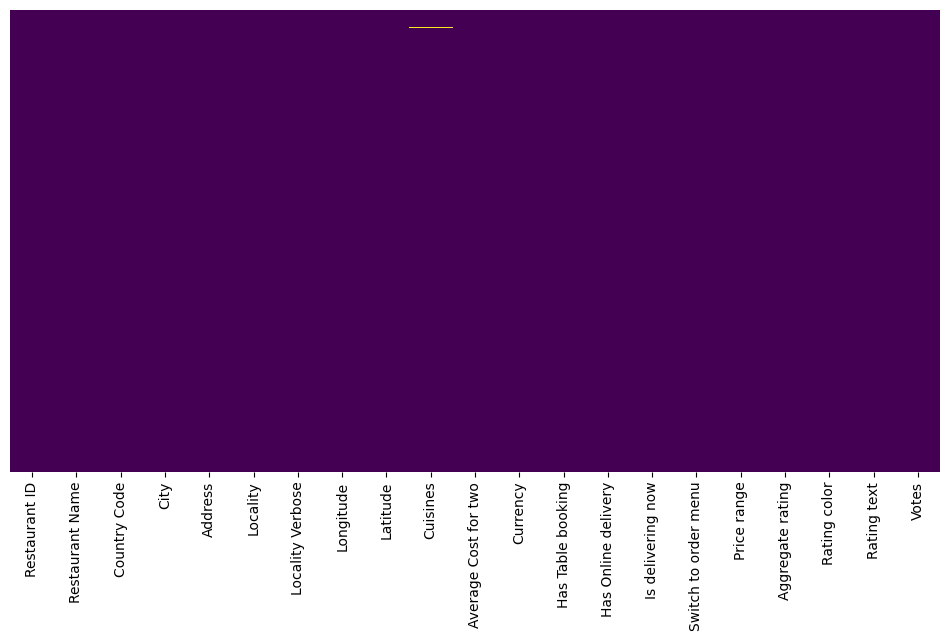

In [10]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

# Data Extraction - Country-Code.xlsx

In [11]:
df_country=pd.read_excel('Country-Code.xlsx')
df_country

,Country Code,Country
0,1,India
1,14,Australia
2,30,Brazil
3,37,Canada
4,94,Indonesia
5,148,New Zealand
6,162,Phillipines
7,166,Qatar
8,184,Singapore
9,189,South Africa


In [12]:
list(df_country.columns)

['Country Code', 'Country']

In [13]:
list(df.columns)

['Restaurant ID',
 'Restaurant Name',
 'Country Code',
 'City',
 'Address',
 'Locality',
 'Locality Verbose',
 'Longitude',
 'Latitude',
 'Cuisines',
 'Average Cost for two',
 'Currency',
 'Has Table booking',
 'Has Online delivery',
 'Is delivering now',
 'Switch to order menu',
 'Price range',
 'Aggregate rating',
 'Rating color',
 'Rating text',
 'Votes']

# Common Column in both files - 'Country Code'

In [14]:
df_country.shape 

(15, 2)

# merge df,df_country  with 'Country Code' col

In [15]:
final_df=pd.merge(df,df_country,on='Country Code', how='left')

In [16]:
final_df.head(2)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines


In [17]:
# To check Data Types
final_df.dtypes

Restaurant ID             int64
Restaurant Name          object
Country Code              int64
City                     object
Address                  object
Locality                 object
Locality Verbose         object
Longitude               float64
Latitude                float64
Cuisines                 object
Average Cost for two      int64
Currency                 object
Has Table booking        object
Has Online delivery      object
Is delivering now        object
Switch to order menu     object
Price range               int64
Aggregate rating        float64
Rating color             object
Rating text              object
Votes                     int64
Country                  object
dtype: object

In [18]:
list(final_df.columns)

['Restaurant ID',
 'Restaurant Name',
 'Country Code',
 'City',
 'Address',
 'Locality',
 'Locality Verbose',
 'Longitude',
 'Latitude',
 'Cuisines',
 'Average Cost for two',
 'Currency',
 'Has Table booking',
 'Has Online delivery',
 'Is delivering now',
 'Switch to order menu',
 'Price range',
 'Aggregate rating',
 'Rating color',
 'Rating text',
 'Votes',
 'Country']

## Countries transaction

In [19]:
country_names=final_df.Country.value_counts().index
list(country_names)

['India',
 'United States',
 'United Kingdom',
 'Brazil',
 'UAE',
 'South Africa',
 'New Zealand',
 'Turkey',
 'Australia',
 'Phillipines',
 'Indonesia',
 'Singapore',
 'Qatar',
 'Sri Lanka',
 'Canada']

In [20]:
#country_names=final_df.Country.value_counts()
#country_names

In [21]:
country_val=final_df.Country.value_counts().values
country_val

array([8652,  434,   80,   60,   60,   60,   40,   34,   24,   22,   21,
         20,   20,   20,    4], dtype=int64)

([<matplotlib.patches.Wedge at 0x21d971f3ac0>,
 [Text(-1.0829742700952103, 0.19278674827836725, 'India'),
  Text(1.077281715838356, -0.22240527134123297, 'United States'),
  Text(1.0995865153823035, -0.03015783794312073, 'United Kingdom')],
 [Text(-0.590713238233751, 0.10515640815183668, '94.39%'),
  Text(0.5876082086391032, -0.12131196618612707, '4.73%'),
  Text(0.5997744629358018, -0.01644972978715676, '0.87%')])

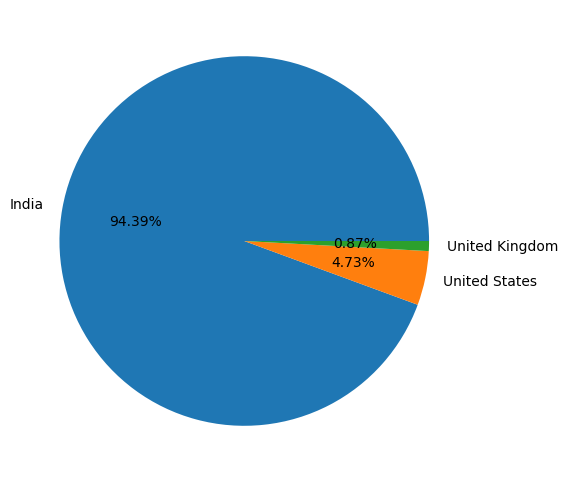

In [22]:
# Pie Chart- Top 3 countries that uses zomato
plt.pie(country_val[:3],labels=country_names[:3],autopct='%1.2f%%')

Observation: Zomato maximum records or transaction are from India After that USA and then United Kingdoms

([<matplotlib.patches.Wedge at 0x21d9724f100>,
 [Text(-1.0829742700952103, 0.19278674827836725, 'India'),
  Text(1.077281715838356, -0.22240527134123297, 'United States'),
  Text(1.0995865153823035, -0.03015783794312073, 'United Kingdom')])

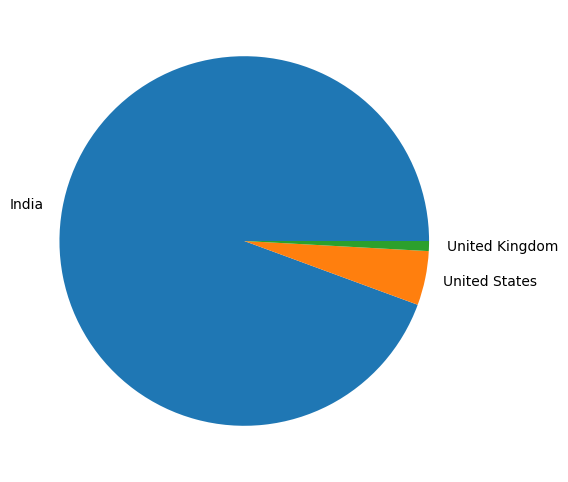

In [23]:
plt.pie(country_val[:3],labels=country_names[:3])

In [24]:
final_df.shape 

(9551, 22)

## Collecting Rating Columns

In [25]:
ratings=final_df.groupby(['Aggregate rating','Rating color','Rating text'])
ratings

In [26]:
ratings=final_df.groupby(['Aggregate rating','Rating color','Rating text']).size()
ratings

Aggregate rating  Rating color  Rating text
0.0               White         Not rated      2148
1.8               Red           Poor              1
1.9               Red           Poor              2
2.0               Red           Poor              7
2.1               Red           Poor             15
2.2               Red           Poor             27
2.3               Red           Poor             47
2.4               Red           Poor             87
2.5               Orange        Average         110
2.6               Orange        Average         191
2.7               Orange        Average         250
2.8               Orange        Average         315
2.9               Orange        Average         381
3.0               Orange        Average         468
3.1               Orange        Average         519
3.2               Orange        Average         522
3.3               Orange        Average         483
3.4               Orange        Average         498
3.5               Ye

In [27]:
ratings=final_df.groupby(['Aggregate rating','Rating color','Rating text']).size().reset_index()
ratings

,Aggregate rating,Rating color,Rating text,0
0,0.0,White,Not rated,2148
1,1.8,Red,Poor,1
2,1.9,Red,Poor,2
3,2.0,Red,Poor,7
4,2.1,Red,Poor,15
5,2.2,Red,Poor,27
6,2.3,Red,Poor,47
7,2.4,Red,Poor,87
8,2.5,Orange,Average,110
9,2.6,Orange,Average,191


In [28]:
ratings=final_df.groupby(['Aggregate rating','Rating color','Rating text']).size().reset_index().rename(columns={0:'Rating Count'})

In [29]:
ratings

,Aggregate rating,Rating color,Rating text,Rating Count
0,0.0,White,Not rated,2148
1,1.8,Red,Poor,1
2,1.9,Red,Poor,2
3,2.0,Red,Poor,7
4,2.1,Red,Poor,15
5,2.2,Red,Poor,27
6,2.3,Red,Poor,47
7,2.4,Red,Poor,87
8,2.5,Orange,Average,110
9,2.6,Orange,Average,191


## Observation
1. When Rating is between 4.5 to 4.9---> Excellent
2. When Rating are between 4.0 to 3.4--->very good
3. when Rating is between 3.5 to 3.9----> good
4. when Rating is between 3.0 to 3.4----> average
5. when Rating is between 2.5 to 2.9----> average
6. when Rating is between 2.0 to 2.4----> Poor

In [30]:
ratings.head()

,Aggregate rating,Rating color,Rating text,Rating Count
0,0.0,White,Not rated,2148
1,1.8,Red,Poor,1
2,1.9,Red,Poor,2
3,2.0,Red,Poor,7
4,2.1,Red,Poor,15


In [31]:
# to make diagram bigger

import matplotlib
matplotlib.rcParams['figure.figsize'] = (12, 6)

<AxesSubplot: xlabel='Aggregate rating', ylabel='Rating Count'>

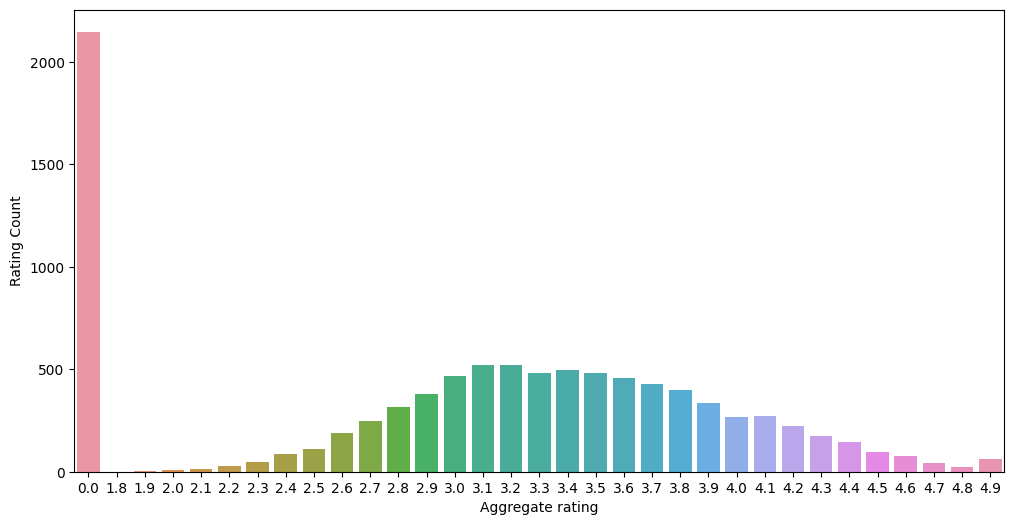

In [32]:
sns.barplot(x="Aggregate rating",y="Rating Count",data=ratings)

<AxesSubplot: xlabel='Aggregate rating', ylabel='Rating Count'>

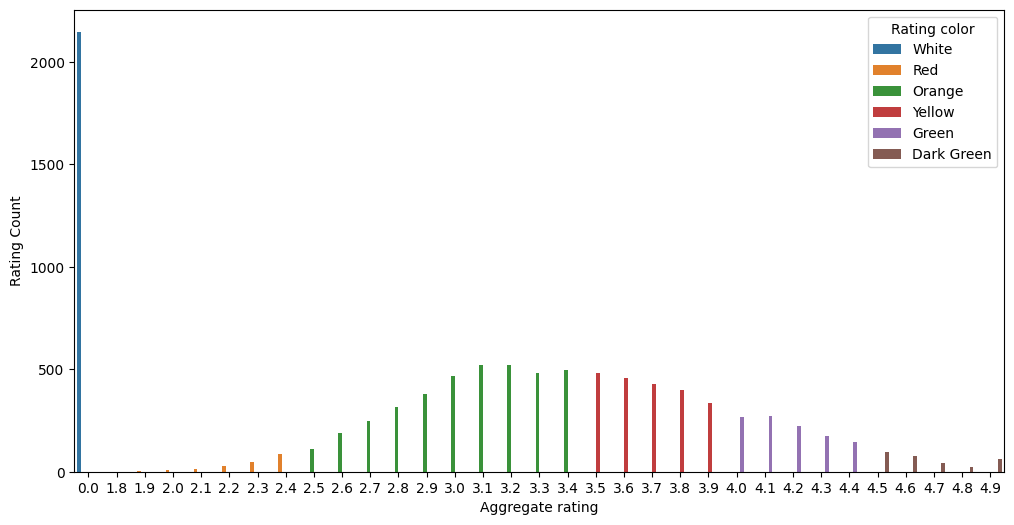

In [33]:
sns.barplot(x="Aggregate rating",y="Rating Count",hue='Rating color',data=ratings)

<AxesSubplot: xlabel='Aggregate rating', ylabel='Rating Count'>

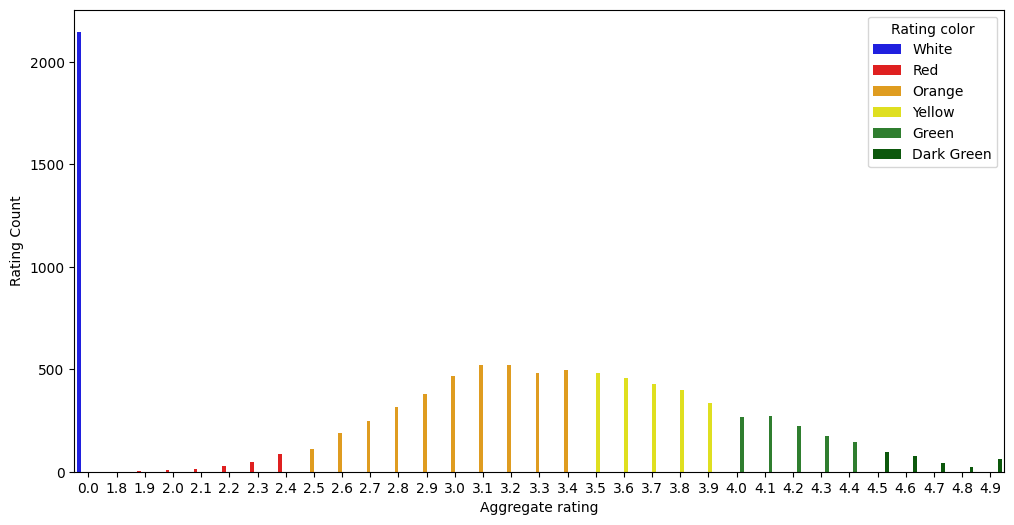

In [34]:
# for color match 
sns.barplot(x="Aggregate rating",y="Rating Count",hue='Rating color',data=ratings,palette=['blue','red','orange','yellow','forestgreen','darkgreen'])

## Observation:
1. Not Rated count is very high
2. Maximum number of rating are between 2.5 to 3.4

<AxesSubplot: xlabel='Rating color', ylabel='count'>

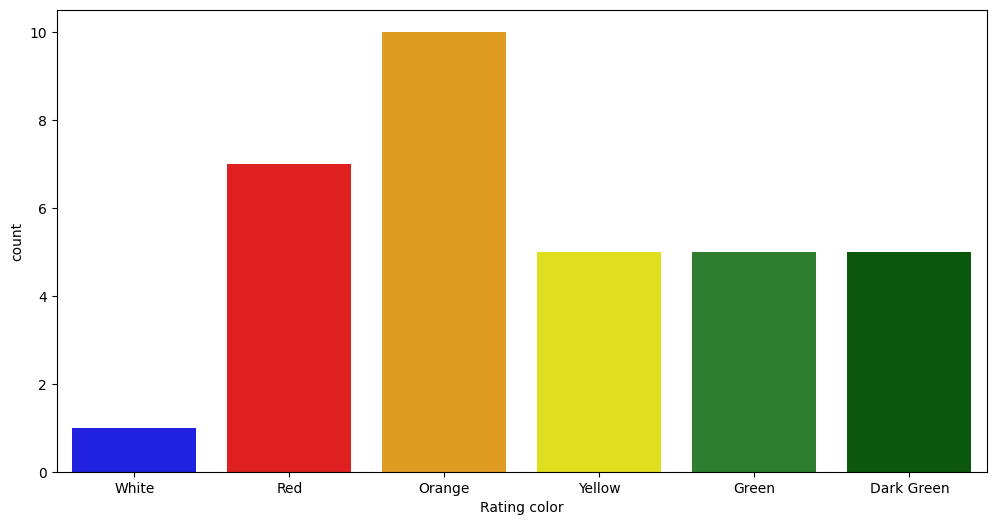

In [35]:
# Count plot    y axis -- frequency of color
sns.countplot(x="Rating color",data=ratings,palette=['blue','red','orange','yellow','forestgreen','darkgreen'])

## Find the countries name that has given 0 rating 

In [36]:
# Find the countries name that has given 0 rating 
final_df[final_df['Rating color']=='White'].groupby('Country').size().reset_index()

,Country,0
0,Brazil,5
1,India,2139
2,United Kingdom,1
3,United States,3


In [37]:
final_df.groupby(['Aggregate rating','Country']).size().reset_index().head(5)

,Aggregate rating,Country,0
0,0.0,Brazil,5
1,0.0,India,2139
2,0.0,United Kingdom,1
3,0.0,United States,3
4,1.8,India,1


## Observations:
Maximum number of 0 ratings are from Indian customers

## find out which currency is used by which country?


In [38]:
list(final_df.columns)

['Restaurant ID',
 'Restaurant Name',
 'Country Code',
 'City',
 'Address',
 'Locality',
 'Locality Verbose',
 'Longitude',
 'Latitude',
 'Cuisines',
 'Average Cost for two',
 'Currency',
 'Has Table booking',
 'Has Online delivery',
 'Is delivering now',
 'Switch to order menu',
 'Price range',
 'Aggregate rating',
 'Rating color',
 'Rating text',
 'Votes',
 'Country']

In [39]:
final_df.groupby(['Country','Currency']).size().reset_index()

,Country,Currency,0
0,Australia,Dollar($),24
1,Brazil,Brazilian Real(R$),60
2,Canada,Dollar($),4
3,India,Indian Rupees(Rs.),8652
4,Indonesia,Indonesian Rupiah(IDR),21
5,New Zealand,NewZealand($),40
6,Phillipines,Botswana Pula(P),22
7,Qatar,Qatari Rial(QR),20
8,Singapore,Dollar($),20
9,South Africa,Rand(R),60


## Which Countries do have online deliveries option

In [40]:
final_df.groupby(['Country','Has Online delivery']).size().reset_index()

,Country,Has Online delivery,0
0,Australia,No,24
1,Brazil,No,60
2,Canada,No,4
3,India,No,6229
4,India,Yes,2423
5,Indonesia,No,21
6,New Zealand,No,40
7,Phillipines,No,22
8,Qatar,No,20
9,Singapore,No,20


In [41]:
final_df.groupby(['Has Online delivery']).size().reset_index()

,Has Online delivery,0
0,No,7100
1,Yes,2451


In [42]:
final_df[final_df['Has Online delivery'] == "Yes"].Country.value_counts()

India    2423
UAE        28
Name: Country, dtype: int64

## Observations: 
1. Online Deliveries are available in India and UAE   

## a pie chart for top 5 cities distribution

In [43]:
list(final_df.columns)

['Restaurant ID',
 'Restaurant Name',
 'Country Code',
 'City',
 'Address',
 'Locality',
 'Locality Verbose',
 'Longitude',
 'Latitude',
 'Cuisines',
 'Average Cost for two',
 'Currency',
 'Has Table booking',
 'Has Online delivery',
 'Is delivering now',
 'Switch to order menu',
 'Price range',
 'Aggregate rating',
 'Rating color',
 'Rating text',
 'Votes',
 'Country']

In [44]:
final_df.City.value_counts().index

Index(['New Delhi', 'Gurgaon', 'Noida', 'Faridabad', 'Ghaziabad',
       'Bhubaneshwar', 'Amritsar', 'Ahmedabad', 'Lucknow', 'Guwahati',
       ...
       'Ojo Caliente', 'Montville', 'Monroe', 'Miller', 'Middleton Beach',
       'Panchkula', 'Mc Millan', 'Mayfield', 'Macedon', 'Vineland Station'],
      dtype='object', length=141)

In [45]:
city_values=final_df.City.value_counts().values
city_labels=final_df.City.value_counts().index

In [46]:
city_values

array([5473, 1118, 1080,  251,   25,   21,   21,   21,   21,   21,   20,
         20,   20,   20,   20,   20,   20,   20,   20,   20,   20,   20,
         20,   20,   20,   20,   20,   20,   20,   20,   20,   20,   20,
         20,   20,   20,   20,   20,   20,   20,   20,   20,   20,   20,
         20,   20,   20,   20,   20,   20,   20,   20,   20,   20,   20,
         20,   20,   20,   20,   20,   20,   20,   20,   20,   20,   20,
         20,   20,   20,   20,   20,   20,   20,   20,   20,   20,   20,
         18,   18,   16,   14,   11,    6,    4,    4,    3,    3,    2,
          2,    2,    2,    2,    2,    2,    2,    1,    1,    1,    1,
          1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
          1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
          1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
          1,    1,    1,    1,    1,    1,    1,    1,    1], dtype=int64)

In [47]:
city_labels

Index(['New Delhi', 'Gurgaon', 'Noida', 'Faridabad', 'Ghaziabad',
       'Bhubaneshwar', 'Amritsar', 'Ahmedabad', 'Lucknow', 'Guwahati',
       ...
       'Ojo Caliente', 'Montville', 'Monroe', 'Miller', 'Middleton Beach',
       'Panchkula', 'Mc Millan', 'Mayfield', 'Macedon', 'Vineland Station'],
      dtype='object', length=141)

([<matplotlib.patches.Wedge at 0x21d9a0127d0>,
 [Text(-0.6145352824185932, 0.9123301960708633, 'New Delhi'),
  Text(0.0623675251198054, -1.0982305276263407, 'Gurgaon'),
  Text(0.8789045225625368, -0.6614581167535246, 'Noida'),
  Text(1.0922218418223437, -0.13058119407559224, 'Faridabad'),
  Text(1.099946280005612, -0.010871113182029924, 'Ghaziabad')],
 [Text(-0.3352010631374145, 0.497634652402289, '68.87%'),
  Text(0.0340186500653484, -0.5990348332507311, '14.07%'),
  Text(0.47940246685229276, -0.36079533641101336, '13.59%'),
  Text(0.5957573682667329, -0.07122610585941394, '3.16%'),
  Text(0.5999706981848791, -0.005929698099289049, '0.31%')])

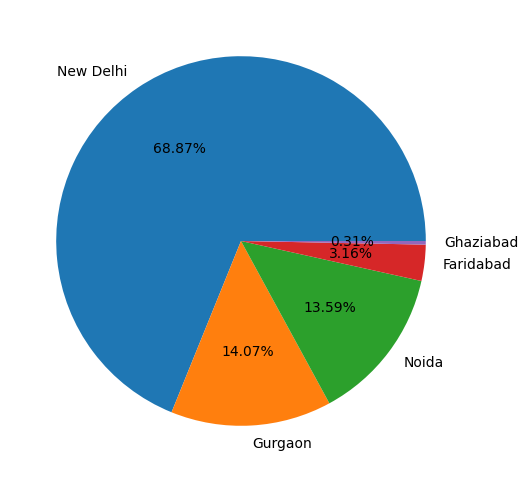

In [48]:
plt.pie(city_values[:5],labels=city_labels[:5],autopct='%1.2f%%')

## Find the top 10 cuisines

In [49]:
Cuisines_values=final_df.Cuisines.value_counts().values
Cuisines_labels=final_df.Cuisines.value_counts().index

In [50]:
Cuisines_values

array([936, 511, 354, ...,   1,   1,   1], dtype=int64)

In [51]:
Cuisines_labels

Index(['North Indian', 'North Indian, Chinese', 'Chinese', 'Fast Food',
       'North Indian, Mughlai', 'Cafe', 'Bakery',
       'North Indian, Mughlai, Chinese', 'Bakery, Desserts', 'Street Food',
       ...
       'Cafe, Pizza, Burger',
       'Healthy Food, Continental, Juices, Beverages, Italian, Salad, Lebanese',
       'Goan, American, Portuguese', 'South Indian, Desserts, Beverages',
       'Healthy Food, North Indian, Italian, Salad', 'Bengali, Fast Food',
       'North Indian, Rajasthani, Asian',
       'Chinese, Thai, Malaysian, Indonesian',
       'Bakery, Desserts, North Indian, Bengali, South Indian',
       'Italian, World Cuisine'],
      dtype='object', length=1825)

([<matplotlib.patches.Wedge at 0x21d9a06f670>,
 [Text(0.7383739846958008, 0.8153550507137645, 'North Indian'),
  Text(-0.5794679314239953, 0.9349956772366362, 'North Indian, Chinese'),
  Text(-1.067309479615702, 0.26617752482593154, 'Chinese'),
  Text(-1.0185984499802057, -0.4152796620326146, 'Fast Food'),
  Text(-0.5935788454809928, -0.9261015895664211, 'North Indian, Mughlai'),
  Text(-0.005887079599915552, -1.0999842463843672, 'Cafe'),
  Text(0.4842062514572988, -0.9876964645323336, 'Bakery'),
  Text(0.808736477166136, -0.7456174022251013, 'North Indian, Mughlai, Chinese'),
  Text(1.0055375294202338, -0.44597564611473206, 'Bakery, Desserts'),
  Text(1.090298995560443, -0.14576728123927227, 'Street Food')],
 [Text(0.4027494461977095, 0.4447391185711442, '26.58%'),
  Text(-0.316073417140361, 0.5099976421290743, '14.51%'),
  Text(-0.5821688070631101, 0.14518774081414446, '10.05%'),
  Text(-0.5555991545346576, -0.22651617929051704, '10.05%'),
  Text(-0.32377027935326874, -0.505146321581

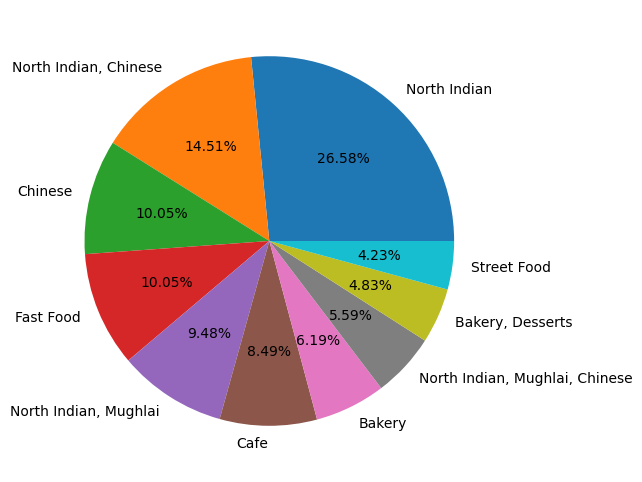

In [52]:
plt.pie(Cuisines_values[:10],labels=Cuisines_labels[:10],autopct='%1.2f%%')

In [53]:
list(final_df.columns)

['Restaurant ID',
 'Restaurant Name',
 'Country Code',
 'City',
 'Address',
 'Locality',
 'Locality Verbose',
 'Longitude',
 'Latitude',
 'Cuisines',
 'Average Cost for two',
 'Currency',
 'Has Table booking',
 'Has Online delivery',
 'Is delivering now',
 'Switch to order menu',
 'Price range',
 'Aggregate rating',
 'Rating color',
 'Rating text',
 'Votes',
 'Country']

# Average Cost Prediction

## 1. Drop unnecessary columns

In [54]:
final_df.drop(columns=['Restaurant ID','Restaurant Name','Is delivering now','Switch to order menu','Price range','Rating color'],axis=1,inplace=True)
final_df.drop(columns=['Address','Locality','Locality Verbose'],axis=1,inplace=True)

In [55]:
list(final_df.columns)

['Country Code',
 'City',
 'Longitude',
 'Latitude',
 'Cuisines',
 'Average Cost for two',
 'Currency',
 'Has Table booking',
 'Has Online delivery',
 'Aggregate rating',
 'Rating text',
 'Votes',
 'Country']

In [56]:
final_df.shape

(9551, 13)

## 2. Filter for India and 4 large cities

In [57]:
final_df[final_df['Country Code']==1]
final_df=final_df[final_df['City'].isin(['New Delhi','Gurgaon','Noida','Faridabad'])]
# Drop country code 
final_df.drop(columns=['Country Code','Currency','Country'],axis=1,inplace=True)

C:\Users\Muthu Ishwarya\AppData\Local\Temp\ipykernel_13848\3983339721.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df.drop(columns=['Country Code','Currency','Country'],axis=1,inplace=True)


In [58]:
list(final_df.columns)

['City',
 'Longitude',
 'Latitude',
 'Cuisines',
 'Average Cost for two',
 'Has Table booking',
 'Has Online delivery',
 'Aggregate rating',
 'Rating text',
 'Votes']

In [59]:
final_df.shape

(7922, 10)

## 3. Feature Engineering
Encode city, ‘Has Table Booking’, ‘Has Online Delivery’ & ‘Rating text’ 
## Using label encoder

In [60]:
from sklearn.preprocessing import LabelEncoder
encoder= LabelEncoder()
final_df['City']=encoder.fit_transform(final_df['City'])
final_df['Has Table booking']=encoder.fit_transform(final_df['Has Table booking'])
final_df['Has Online delivery']=encoder.fit_transform(final_df['Has Online delivery'])
final_df['Rating text']=encoder.fit_transform(final_df['Rating text'])

C:\Users\Muthu Ishwarya\AppData\Local\Temp\ipykernel_13848\1636078573.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df['City']=encoder.fit_transform(final_df['City'])
C:\Users\Muthu Ishwarya\AppData\Local\Temp\ipykernel_13848\1636078573.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df['Has Table booking']=encoder.fit_transform(final_df['Has Table booking'])
C:\Users\Muthu Ishwarya\AppData\Local\Temp\ipykernel_13848\1636078573.py:5: SettingWithCopyWarning: 
A value is trying to be set

In [61]:
#to solve multi encoding problem so 3 is not given more weightage than..say 1 or delhi
#so just change them to columns from rows
# one hot encoding is what this is called
# then reomve multi-collinearity using get dummies
final_df=pd.get_dummies(final_df, columns=['City','Rating text'],drop_first=True)
final_df.head()

,Longitude,Latitude,Cuisines,Average Cost for two,Has Table booking,Has Online delivery,Aggregate rating,Votes,City_1,City_2,City_3,Rating text_1,Rating text_2,Rating text_3,Rating text_4,Rating text_5
865,77.306640,28.490059,"Chinese, Fast Food, Bakery",250,0,0,2.9,4,0,0,0,0,0,0,0,0
866,77.304776,28.490157,"North Indian, Chinese",500,0,0,2.8,16,0,0,0,0,0,0,0,0
867,77.305563,28.490137,North Indian,150,0,0,2.8,8,0,0,0,0,0,0,0,0
868,77.306102,28.490098,North Indian,150,0,0,2.9,8,0,0,0,0,0,0,0,0
869,77.305745,28.490062,Bakery,100,0,0,2.8,7,0,0,0,0,0,0,0,0


In [62]:
list(final_df.columns)

['Longitude',
 'Latitude',
 'Cuisines',
 'Average Cost for two',
 'Has Table booking',
 'Has Online delivery',
 'Aggregate rating',
 'Votes',
 'City_1',
 'City_2',
 'City_3',
 'Rating text_1',
 'Rating text_2',
 'Rating text_3',
 'Rating text_4',
 'Rating text_5']

In [63]:
final_df.shape

(7922, 16)

## Remove Highly Correlated columns

In [64]:
final_df.corr()

C:\Users\Muthu Ishwarya\AppData\Local\Temp\ipykernel_13848\2626907977.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  final_df.corr()


,Longitude,Latitude,Average Cost for two,Has Table booking,Has Online delivery,Aggregate rating,Votes,City_1,City_2,City_3,Rating text_1,Rating text_2,Rating text_3,Rating text_4,Rating text_5
Longitude,1.000000,0.997829,0.071752,0.059417,0.138671,0.224523,0.071641,0.010396,0.050866,-0.063738,0.016837,0.078380,-0.230858,0.031097,0.045898
Latitude,0.997829,1.000000,0.070993,0.059974,0.138488,0.224383,0.071598,0.005881,0.058521,-0.066800,0.016675,0.077904,-0.230663,0.030511,0.045432
Average Cost for two,0.071752,0.070993,1.000000,0.642966,0.076953,0.328440,0.299089,0.076877,-0.010528,-0.040303,0.088936,0.231485,-0.262226,0.011642,0.256787
Has Table booking,0.059417,0.059974,0.642966,1.000000,0.074300,0.248363,0.223811,0.060387,-0.006165,-0.033252,0.037161,0.171125,-0.197568,-0.001265,0.210460
Has Online delivery,0.138671,0.138488,0.076953,0.074300,1.000000,0.341197,0.123734,0.078609,-0.065459,0.039379,0.013018,0.227677,-0.330246,0.116200,0.099185
Aggregate rating,0.224523,0.224383,0.328440,0.248363,0.341197,1.000000,0.291076,0.068629,0.042590,-0.094643,0.108656,0.421704,-0.964542,-0.009681,0.270338
Votes,0.071641,0.071598,0.299089,0.223811,0.123734,0.291076,1.000000,0.015197,0.040301,-0.046770,0.153506,0.203558,-0.197868,-0.009472,0.356758
City_1,0.010396,0.005881,0.076877,0.060387,0.078609,0.068629,0.015197,1.000000,-0.605978,-0.161049,0.029271,0.030870,-0.060114,0.021724,0.040311
City_2,0.050866,0.058521,-0.010528,-0.006165,-0.065459,0.042590,0.040301,-0.605978,1.000000,-0.593935,-0.006346,0.024909,-0.031614,-0.047870,0.018031
City_3,-0.063738,-0.066800,-0.040303,-0.033252,0.039379,-0.094643,-0.046770,-0.161049,-0.593935,1.000000,-0.019337,-0.039035,0.076805,0.051465,-0.048494


In [65]:
final_df.corr()['Average Cost for two']
#print(correlations)

C:\Users\Muthu Ishwarya\AppData\Local\Temp\ipykernel_13848\2870589531.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  final_df.corr()['Average Cost for two']


Longitude               0.071752
Latitude                0.070993
Average Cost for two    1.000000
Has Table booking       0.642966
Has Online delivery     0.076953
Aggregate rating        0.328440
Votes                   0.299089
City_1                  0.076877
City_2                 -0.010528
City_3                 -0.040303
Rating text_1           0.088936
Rating text_2           0.231485
Rating text_3          -0.262226
Rating text_4           0.011642
Rating text_5           0.256787
Name: Average Cost for two, dtype: float64

In [66]:
final_df.shape

(7922, 16)

## 4. Train Test Split and Model Training

In [68]:
X=final_df.drop(columns=['Average Cost for two','Cuisines'])
Y=final_df['Average Cost for two']
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=0)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(6337, 14)
(1585, 14)
(6337,)
(1585,)


In [69]:
X

,Longitude,Latitude,Has Table booking,Has Online delivery,Aggregate rating,Votes,City_1,City_2,City_3,Rating text_1,Rating text_2,Rating text_3,Rating text_4,Rating text_5
865,77.306640,28.490059,0,0,2.9,4,0,0,0,0,0,0,0,0
866,77.304776,28.490157,0,0,2.8,16,0,0,0,0,0,0,0,0
867,77.305563,28.490137,0,0,2.8,8,0,0,0,0,0,0,0,0
868,77.306102,28.490098,0,0,2.9,8,0,0,0,0,0,0,0,0
869,77.305745,28.490062,0,0,2.8,7,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9108,77.367524,28.557537,0,1,2.6,34,0,0,1,0,0,0,0,0
9109,77.367303,28.557929,0,0,0.0,1,0,0,1,0,0,1,0,0
9110,77.367188,28.557842,0,0,0.0,3,0,0,1,0,0,1,0,0
9111,77.367322,28.557930,0,0,0.0,0,0,0,1,0,0,1,0,0


In [70]:
Y

865     250
866     500
867     150
868     150
869     100
       ... 
9108    700
9109    400
9110    600
9111    500
9112    250
Name: Average Cost for two, Length: 7922, dtype: int64

In [71]:
X_train

,Longitude,Latitude,Has Table booking,Has Online delivery,Aggregate rating,Votes,City_1,City_2,City_3,Rating text_1,Rating text_2,Rating text_3,Rating text_4,Rating text_5
1772,77.037115,28.457979,0,0,3.0,4,1,0,0,0,0,0,0,0
4434,77.261704,28.538047,0,1,2.6,24,0,1,0,0,0,0,0,0
8722,77.324500,28.587873,0,1,3.5,87,0,0,1,0,1,0,0,0
4367,77.239811,28.553104,0,0,3.0,6,0,1,0,0,0,0,0,0
6403,77.126012,28.666012,0,0,3.2,23,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6122,77.068647,28.606293,0,0,0.0,1,0,1,0,0,0,1,0,0
4455,77.254767,28.541781,0,1,3.5,23,0,1,0,0,1,0,0,0
2844,77.224382,28.656851,0,0,3.2,39,0,1,0,0,0,0,0,0
3798,77.206653,28.559521,1,0,3.3,23,0,1,0,0,0,0,0,0


In [73]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(X_train,Y_train)

LinearRegression()

## 5. Prediction and Evaluation

In [74]:
Y_pred=reg.predict(X_test)

## Evaluations
from sklearn.metrics import r2_score
r2_score(Y_test,Y_pred)

0.5136046138609258

In [75]:
Y_pred[2]

679.8706459486948